In [1]:
#import libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import lightgbm as lgb
import warnings
from itertools import combinations
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#imports a CSV file to DataFrame format
df=pd.read_csv("mall.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.describe().round(20).T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#drop "CustomerID"  from dataframe 
df_train=df.drop('CustomerID',axis=1)

In [8]:
#find the pairwise correlation of all columns 
df_train.corr()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1884\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_1884\2968123569.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')


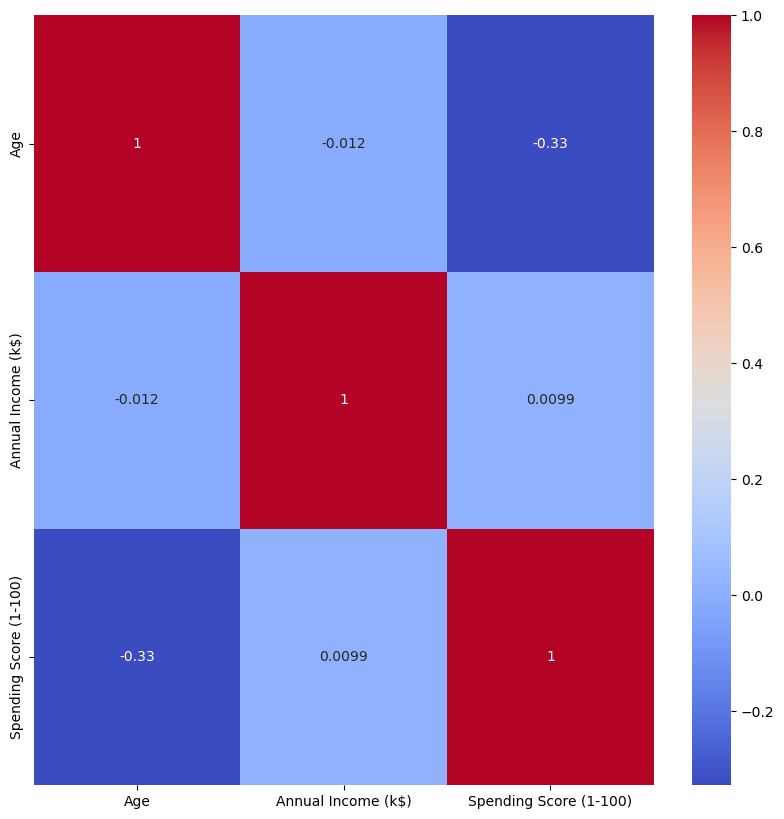

In [9]:
#plot the sns heatmap of df_train correlation
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
#copy the dataset to df_km
df_km=df_train.copy(deep=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Get a list of categorical columns
categorical_cols = df_km.select_dtypes(include='object').columns

# Apply the label encoder to each categorical column
for col in categorical_cols:
    df_km[col] = le.fit_transform(df_km[col])

In [12]:
from sklearn.cluster import KMeans
# select the features
X = df_km

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

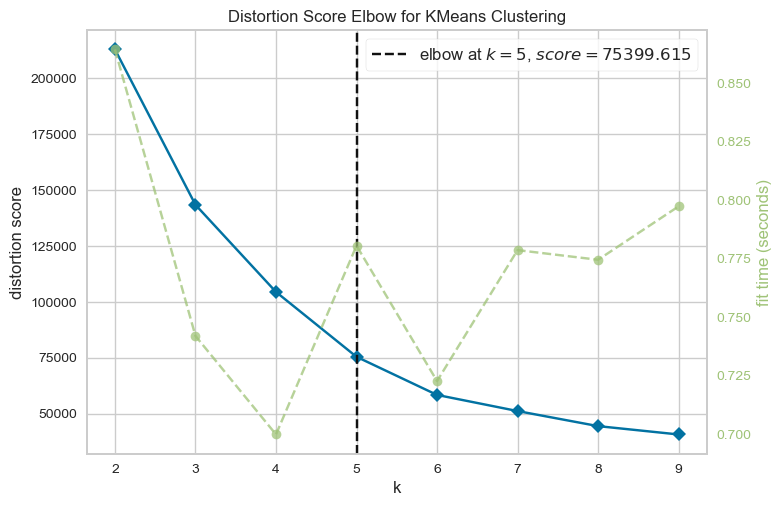

In [13]:
from yellowbrick.cluster import KElbowVisualizer
#calculating the value of K by using elbow method
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

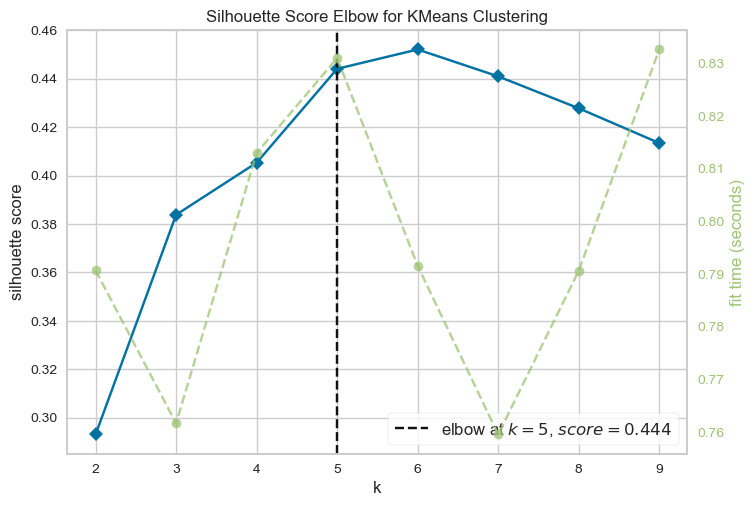

In [14]:
#calculating number of cluster in dataset in dataset using silhouette method
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X)
visualizer.show()
plt.show()

In [15]:
# create a k-means object with the optimal number of clusters
optimal_k = 5 # number of clusters where the elbow is
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# fit the k-means object to the data
kmeans.fit(X)

# predict the cluster for each data point
y_kmeans = kmeans.predict(X)

# add the cluster predictions to the dataframe
df_km['cluster'] = y_kmeans

# display the first 5 rows of the dataframe with the cluster predictions
print(df_km.head())
print(df_km.tail())


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0       1   19                  15                      39        0
1       1   21                  15                      81        4
2       0   20                  16                       6        0
3       0   23                  16                      77        4
4       0   31                  17                      40        0
     Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
195       0   35                 120                      79        1
196       0   45                 126                      28        3
197       1   32                 126                      74        1
198       1   32                 137                      18        3
199       1   30                 137                      83        1


In [16]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


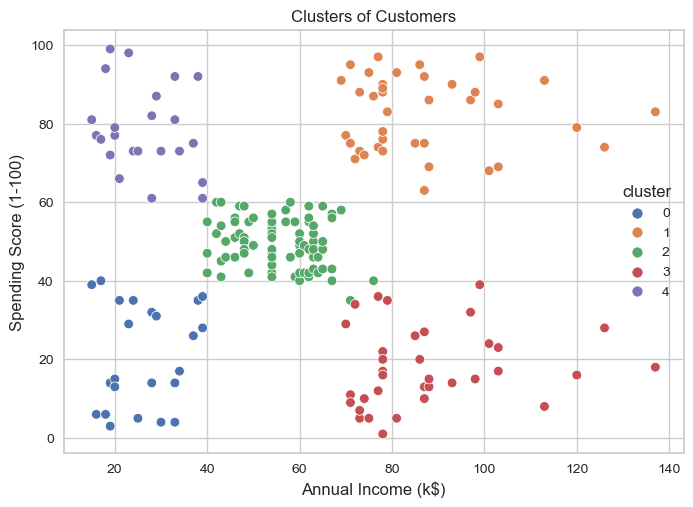

In [17]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df_km, palette="deep")


# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# show the plot
plt.show()

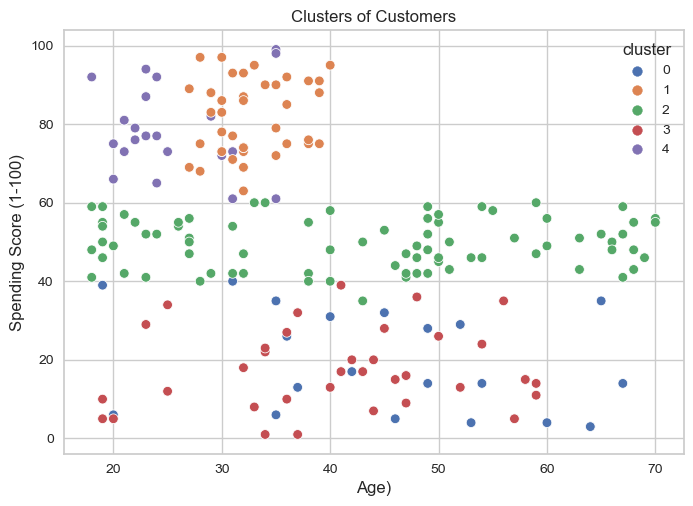

In [18]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster', data=df_km, palette="deep")

# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Age)')
plt.ylabel('Spending Score (1-100)')

# show the plot
plt.show()

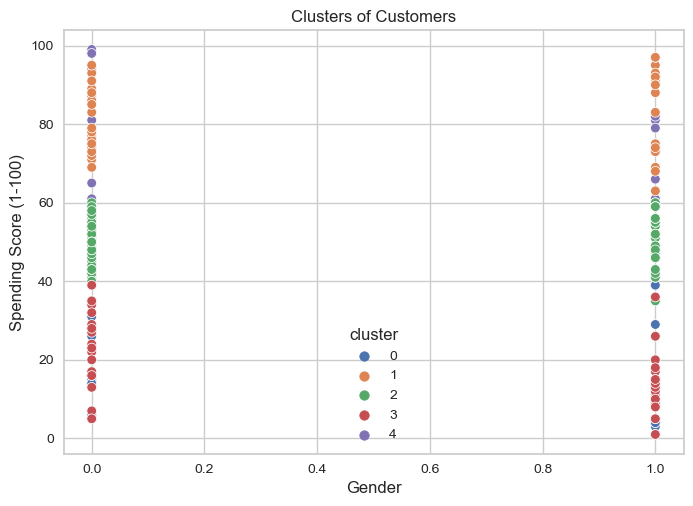

In [19]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Gender', y='Spending Score (1-100)', hue='cluster', data=df_km, palette="deep")

# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')

# show the plot
plt.show()

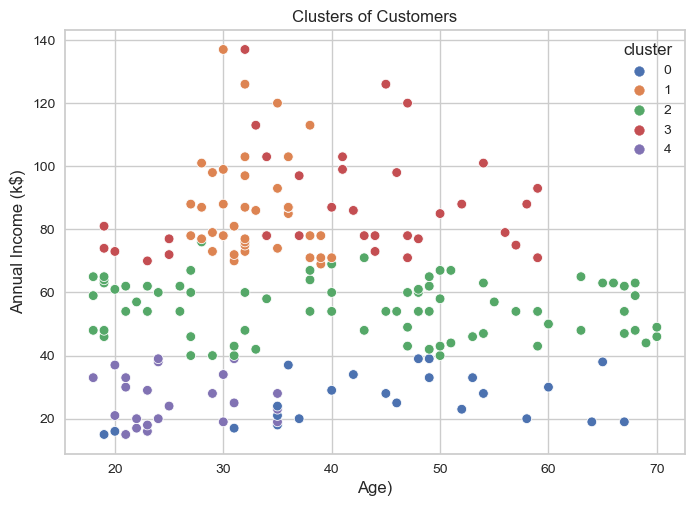

In [20]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='cluster', data=df_km, palette="deep")

# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Age)')
plt.ylabel('Annual Income (k$)')

# show the plot
plt.show()

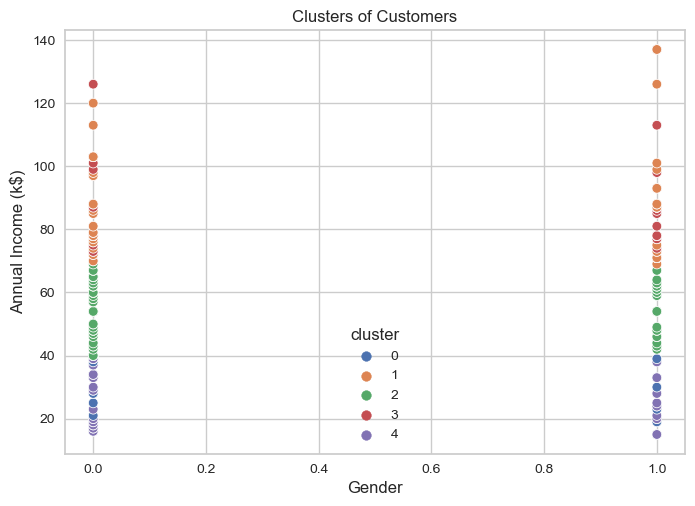

In [21]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Gender', y='Annual Income (k$)', hue='cluster', data=df_km, palette="deep")

# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')

# show the plot
plt.show()